In [35]:
import pandas as pd
import numpy as np

In [7]:
train_data=pd.read_csv("train_data.csv", sep=':::', names=["title", "genre", "description"], engine='python')
test_data=pd.read_csv("test_data.csv", sep=':::', names=["title", "description"], engine='python')

In [8]:
train_data.head()


,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
test_data.head()


,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


C:\Users\User\AppData\Local\Temp\ipykernel_15468\3583499827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette="pastel")


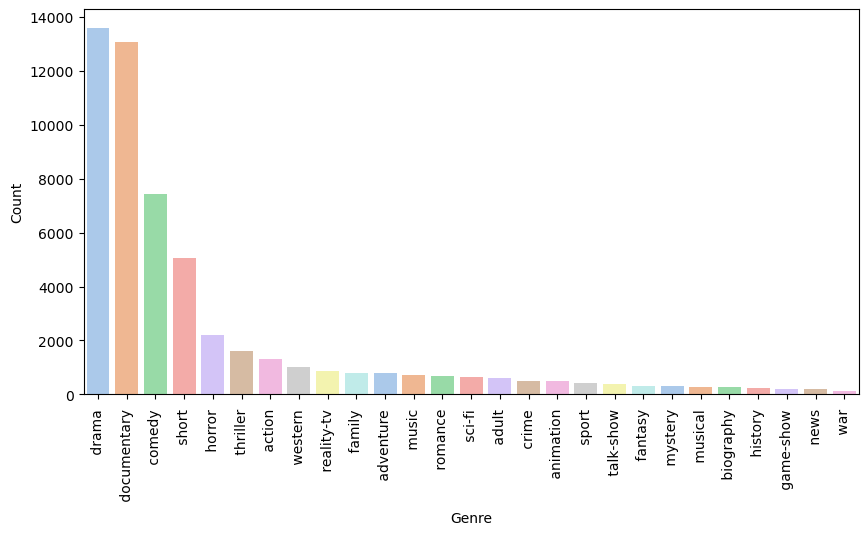

In [18]:
plt.figure(figsize=(10,5))
counts = train_data.genre.value_counts()
sns.barplot(x=counts.index, y=counts, palette="pastel")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [19]:
train_data.genre.value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

#DATA CLEANING

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [21]:
print("Before dropping duplicates: ",train_data.shape)
train_data = train_data.drop_duplicates()
print("After dropping duplicates: ",train_data.shape)

Before dropping duplicates:  (54214, 3)
After dropping duplicates:  (54214, 3)


In [ ]:
CLEANING TEXTS IN THE DATASET

In [24]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
def clean_data(text):
    text = text.lower()
    text = re.sub(r'(@\S+|http\S+|[\w\.-]+@[\w\.-]+|pic.\S+|#|_)', '', text)  
    text = re.sub(r"[^a-zA-Z+']", ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = re.sub(r'\[[^]]*\]|\n', ' ', text)  
    text = "".join([c for c in text if c not in string.punctuation]) 
    text = re.sub(r"\s+", " ", text).strip()  
    return " ".join([word for word in word_tokenize(text) if word not in stop_words and len(word) > 2])  


DATA STATISTICS

In [6]:
import pandas as pd
train_data=pd.read_csv("train_data.csv", sep=':::', names=["title", "genre", "description"], engine='python')
test_data=pd.read_csv("test_data.csv", sep=':::', names=["title", "description"], engine='python')
print(train_data.columns)
print(test_data.columns)

Index(['title', 'genre', 'description'], dtype='object')
Index(['title', 'description'], dtype='object')


In [10]:
print(train_data.columns)  # See available columns


Index(['title', 'genre', 'description', 'length'], dtype='object')


In [12]:
print(train_data.head())  # Ensure the column exists


                                title       genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         description  length  
1   Listening in to a conversation between his do...     546  
2   A brother and sister with a past incestuous r...     184  
3   As the bus empties the students for their fie...     650  
4   To help their unemployed father make ends mee...    1082  
5   The film's title refers not only to the un-re...     625  


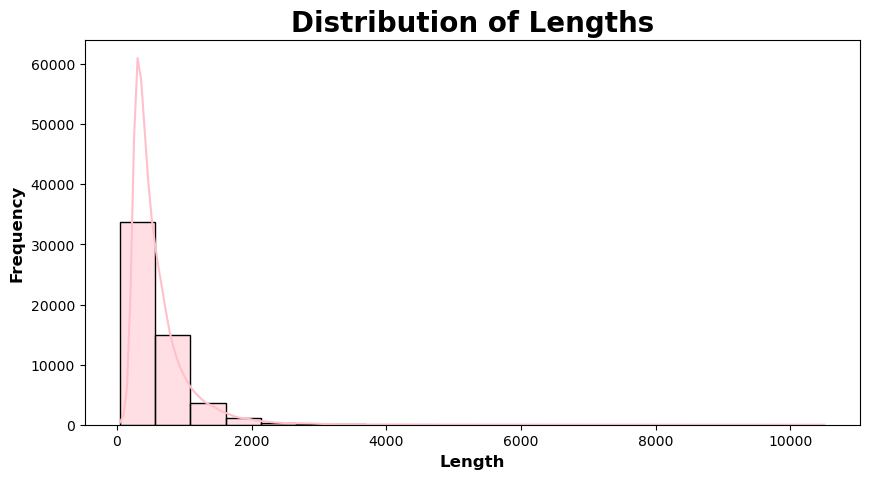

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='length', bins=20, kde=True, color='pink')
plt.xlabel('Length', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=20, fontweight='bold')
plt.show()

CLEANING TEXTS IN THE DATASET

In [27]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
def clean_data(text):
    text = text.lower()
    text = re.sub(r'(@\S+|http\S+|[\w\.-]+@[\w\.-]+|pic.\S+|#|_)', '', text)  
    text = re.sub(r"[^a-zA-Z+']", ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = re.sub(r'\[[^]]*\]|\n', ' ', text)  
    text = "".join([c for c in text if c not in string.punctuation]) 
    text = re.sub(r"\s+", " ", text).strip()  
    return " ".join([word for word in word_tokenize(text) if word not in stop_words and len(word) > 2])  


In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
train_data['description_cleaned'] = train_data['description'].apply(clean_data)
test_data['description_cleaned'] = test_data['description'].apply(clean_data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
import pandas as pd
train_data=pd.read_csv("train_data.csv", sep=':::', names=["title", "genre", "description"], engine='python')
test_data=pd.read_csv("test_data.csv", sep=':::', names=["title", "description"], engine='python')
print(train_data.columns)
print(test_data.columns)

Index(['title', 'genre', 'description'], dtype='object')
Index(['title', 'description'], dtype='object')


In [34]:
print(train_data.columns)

Index(['title', 'genre', 'description'], dtype='object')


In [35]:
print(train_data.head())

                                title       genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         description  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  


In [43]:
print(train_df.columns)  # List all columns


Index(['title', 'genre', 'description'], dtype='object')


In [44]:
if 'description_cleaned' not in train_df.columns:
    train_df['description_cleaned'] = train_df['description'].apply(clean_data)


In [45]:
print(train_df[['description', 'description_cleaned']].head())  


                                         description  \
1   Listening in to a conversation between his do...   
2   A brother and sister with a past incestuous r...   
3   As the bus empties the students for their fie...   
4   To help their unemployed father make ends mee...   
5   The film's title refers not only to the un-re...   

                                 description_cleaned  
1  listening conversation doctor parents year old...  
2  brother sister past incestuous relationship cu...  
3  bus empties students field trip museum natural...  
4  help unemployed father make ends meet edith tw...  
5  films title refers recovered bodies ground zer...  


In [46]:
train_set, val_set, train_label, val_label = train_test_split(
    train_df['description_cleaned'], train_df['genre'], test_size=0.2, shuffle=True, random_state=42
)


FEATURE EXTRACTION

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [10]:
import pandas as pd
train_data=pd.read_csv("train_data.csv", sep=':::', names=["title", "genre", "description"], engine='python') 
print(train_data.columns)  # Expected output: Index(['description', 'genre'], dtype='object')


Index(['title', 'genre', 'description'], dtype='object')


In [8]:
import re

# Function to clean text data
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning function
train_data["description_cleaned"] = train_data["description"].apply(clean_text)

# Now check the updated DataFrame
print(train_data.head())


                                title       genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         description  \
1   Listening in to a conversation between his do...   
2   A brother and sister with a past incestuous r...   
3   As the bus empties the students for their fie...   
4   To help their unemployed father make ends mee...   
5   The film's title refers not only to the un-re...   

                                 description_cleaned  
1  listening in to a conversation between his doc...  
2  a brother and sister with a past incestuous re...  
3  as the bus empties the students for their fiel...  
4  to help their unemployed father make ends meet...  
5  the film s title refers not only to the un rec...  


In [9]:
from sklearn.model_selection import train_test_split

# Ensure 'description_cleaned' exists before proceeding
if 'description_cleaned' not in train_data.columns or 'genre' not in train_data.columns:
    raise KeyError("Columns 'description_cleaned' or 'genre' not found even after preprocessing!")

# Split dataset
train_set, val_set, train_label, val_label = train_test_split(
    train_data['description_cleaned'], train_data['genre'], test_size=0.2, shuffle=True, random_state=42
)

print(f"Train set size: {len(train_set)}, Validation set size: {len(val_set)}")


Train set size: 43371, Validation set size: 10843


In [11]:
print(type(train_set))  # Should be a pandas Series or list
print(train_set.head())  # Check first few rows


<class 'pandas.core.series.Series'>
19254    sex betrayal seduction manipulation addiction ...
12262    autistic teen tony and his friendship with cam...
37144    the one hour special examines this socially et...
21966    this personal narrative documentary uses my bi...
7034     the easy going village policeman artturi sakar...
Name: description_cleaned, dtype: object


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert text into numerical features
train_set_tfidf = vectorizer.fit_transform(train_set)  
val_set_tfidf = vectorizer.transform(val_set)  

print("TF-IDF train set shape:", train_set_tfidf.shape)
print("TF-IDF validation set shape:", val_set_tfidf.shape)


TF-IDF train set shape: (43371, 107137)
TF-IDF validation set shape: (10843, 107137)


In [30]:
import matplotlib.pyplot as plt  # Import matplotlib
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Logistic Regression Model
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
LR_accuracy = accuracy_score(val_label, predict_LR)

#Naive Bayes Model
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
predict_NB = NB_model.predict(val_set_tfidf)
naive_accuracy = accuracy_score(val_label, predict_NB)

#Support Vector Classifier (SVC) Model
SVM_model = SVC()
SVM_model.fit(train_set_tfidf, train_label)
predict_SVM = SVM_model.predict(val_set_tfidf)
svm_accuracy = accuracy_score(val_label, predict_SVM)

columns=['LogisticRegression', 'NaiveBayes', 'SupportVector Machine']
accuracy= [LR_accuracy, naive_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult



,Algorithm,Accuracy
0,LogisticRegression,0.5
1,NaiveBayes,0.5
2,SupportVector Machine,0.0


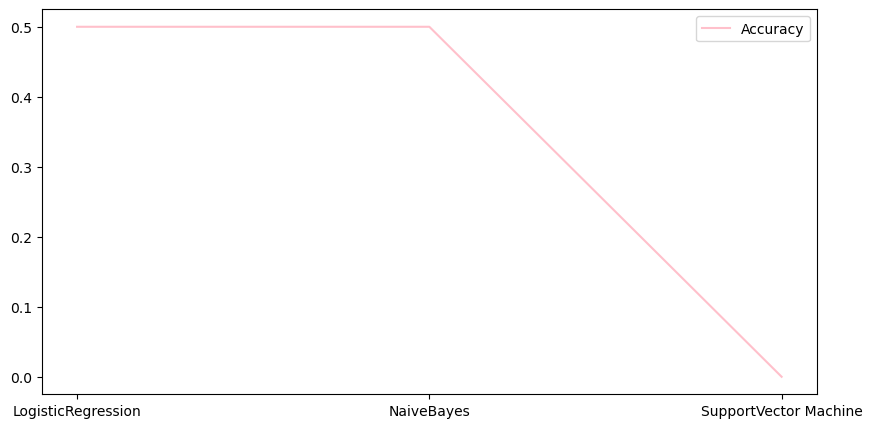

In [32]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy", color="pink")
plt.legend()
plt.show()